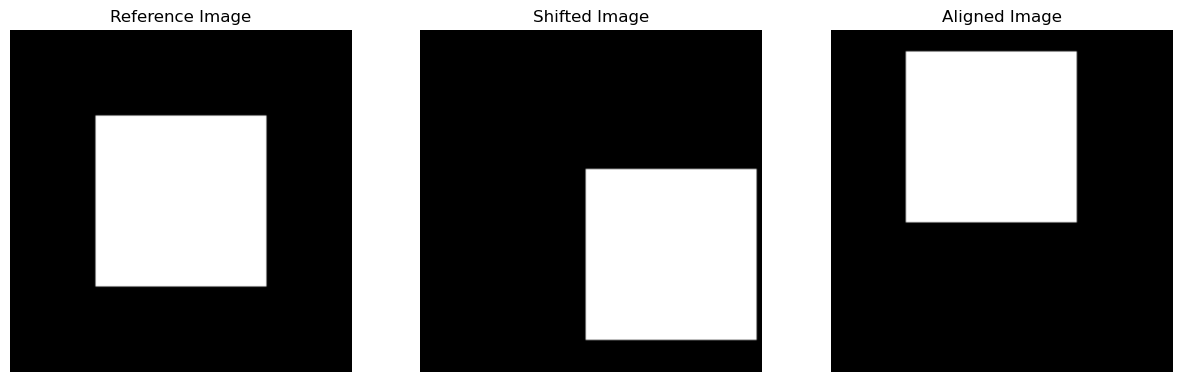

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import fourier_shift
from scipy.fft import fftn, ifftn

def generate_image(size, shift):
    """
    Generates a simple image with a square in the center.
    """
    image = np.zeros((size, size))
    start, end = size // 4, 3 * size // 4
    image[start:end, start:end] = 1
    if shift:
        image = np.roll(image, shift, axis=(0, 1))  # Apply shift
    return image

def register_images(image1, image2):
    """
    Registers image2 to image1 using Fourier Cross Correlation.
    """
    # Fourier transform of both images
    f1 = fftn(image1)
    f2 = fftn(image2)

    # Cross-correlation
    shape = image1.shape
    image_product = f1 * f2.conj()
    cross_correlation = ifftn(image_product)

    # Find the peak in the cross-correlation (shift between images)
    maxima = np.unravel_index(np.argmax(np.abs(cross_correlation)), shape)
    shifts = np.array(maxima) - np.array(shape) // 2

    return shifts

# Generate images
size = 128
ref_image = generate_image(size, shift=None)
shifted_image = generate_image(size, shift=(20, 30))  # Example shift

# Perform image registration
shifts = register_images(ref_image, shifted_image)

# Apply inverse shift to align images
aligned_image = np.roll(shifted_image, -shifts, axis=(0, 1))

# Plotting the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(ref_image, cmap='gray')
axes[0].set_title('Reference Image')
axes[0].axis('off')

axes[1].imshow(shifted_image, cmap='gray')
axes[1].set_title('Shifted Image')
axes[1].axis('off')

axes[2].imshow(aligned_image, cmap='gray')
axes[2].set_title('Aligned Image')
axes[2].axis('off')

plt.show()
